In [21]:
import osmnx as ox
import matplotlib.pyplot as plt
from pyproj import CRS

In [2]:
# Specify the name that is used to seach for the data
place_name = "Kamppi, Helsinki, Finland"

# Fetch OSM street network from the location
graph = ox.graph_from_place(place_name)

In [3]:
type(graph)

networkx.classes.multidigraph.MultiDiGraph

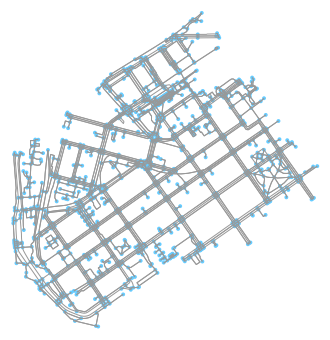

In [4]:
fig, ax = ox.plot_graph(graph)

In [5]:
area = ox.gdf_from_place(place_name)

In [6]:
type(area)

geopandas.geodataframe.GeoDataFrame

In [7]:
area

,geometry,place_name,bbox_north,bbox_south,bbox_east,bbox_west
0,"POLYGON ((24.92064 60.16483, 24.92069 60.16447...","Kamppi, Southern major district, Helsinki, Hel...",60.172075,60.160469,24.943453,24.920642


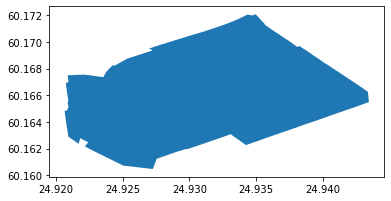

In [9]:
area.plot();

In [10]:
buildings = ox.footprints_from_place(place_name)

In [13]:
buildings.head()

,nodes,addr:city,addr:country,addr:housenumber,addr:street,building,name,name:fi,name:ko,name:sv,...,access,covered,area,members,type,brand,building:part,ele,electrified,addr:unit
8035238,"[60069605, 60069615, 60275530, 1036979252, 105...",Helsinki,FI,22-24,Mannerheimintie,public,Lasipalatsi,Lasipalatsi,라시팔라치,Glaspalatset,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8042297,"[1378950415, 1378950417, 1378950418, 319515866...",Helsinki,FI,2,Runeberginkatu,yes,Radisson Blu Royal,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14797170,"[146125363, 3203698292, 3203698293, 3203698294...",Helsinki,FI,10,Lapinlahdenkatu,school,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14797171,"[146125420, 146125424, 3203623643, 3203623641,...",NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14797172,"[1019881039, 3205236782, 3205236781, 146125459...",NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Retrieve restaurants
restaurants = ox.pois_from_place(place_name, amenities=['restaurant'])

# How many restaurants do we have?
len(restaurants)

153

In [15]:
cols = ['name', 'opening_hours', 'addr:city', 'addr:country',
        'addr:housenumber', 'addr:postcode', 'addr:street']
# Print only selected cols
restaurants[cols].head(10)

,name,opening_hours,addr:city,addr:country,addr:housenumber,addr:postcode,addr:street
60062502,Kabuki,NaN,Helsinki,FI,12,00180,Lapinlahdenkatu
62965963,Empire Plaza,NaN,NaN,NaN,NaN,NaN,NaN
76617692,Johan Ludvig,NaN,Helsinki,FI,NaN,NaN,NaN
76624339,Ravintola Rivoletto,Mo-Th 11:00-23:00; Fr 11:00-24:00; Sa 15:00-24...,Helsinki,FI,38,00120,Albertinkatu
76624351,Pueblo,NaN,Helsinki,FI,NaN,NaN,Eerikinkatu
76627823,Atabar,NaN,Helsinki,FI,NaN,NaN,Eerikinkatu
89074039,Papa Albert,"Mo-Th 10:00-14:00, 17:30-22:00; Fr 11:00-23:00...",Helsinki,FI,30,00120,Albertinkatu
151006260,Ravintola China,Mo-Fr 11:00-23:00; Sa-Su 12:00-23:00; PH off,Helsinki,FI,25,00100,Annankatu
151006483,Tony's deli + Street Bar,NaN,7,FI,7,00120,Bulevardi
151006932,Haru Sushi,Mo-Fr 11:00-21:00; Sa 12:00-21:00; Su 13:00-21:00,Helsinki,FI,30,00120,Fredrikinkatu


In [16]:
nodes, edges = ox.graph_to_gdfs(graph)

In [17]:
nodes.head()

,y,x,osmid,highway,ref,geometry
3216400385,60.167552,24.934005,3216400385,turning_circle,NaN,POINT (24.93400 60.16755)
1372233731,60.162290,24.929274,1372233731,crossing,NaN,POINT (24.92927 60.16229)
319885318,60.165072,24.925487,319885318,NaN,NaN,POINT (24.92549 60.16507)
1005744134,60.161622,24.924423,1005744134,NaN,NaN,POINT (24.92442 60.16162)
3216400394,60.167662,24.933920,3216400394,NaN,NaN,POINT (24.93392 60.16766)


In [18]:
edges.head()

,u,v,key,osmid,name,highway,maxspeed,oneway,length,geometry,lanes,service,tunnel,junction,access,bridge,ref
0,3216400385,301360890,0,15240373,Kansakoulukuja,residential,30,False,13.177,"LINESTRING (24.93400 60.16755, 24.93393 60.167...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1372233731,298367080,0,86533507,NaN,footway,NaN,False,6.925,"LINESTRING (24.92927 60.16229, 24.92917 60.16225)",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1372233731,292859610,0,15103120,NaN,primary_link,30,True,33.874,"LINESTRING (24.92927 60.16229, 24.92930 60.162...",2,NaN,NaN,NaN,NaN,NaN,NaN
3,1372233731,4430643601,0,"[154412960, 86533507]",NaN,footway,NaN,False,12.489,"LINESTRING (24.92927 60.16229, 24.92941 60.162...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1372233731,311043714,0,86533509,Hietalahdenkatu,primary,30,True,38.768,"LINESTRING (24.92927 60.16229, 24.92938 60.162...",2,NaN,NaN,NaN,NaN,NaN,NaN


# Plotting the data

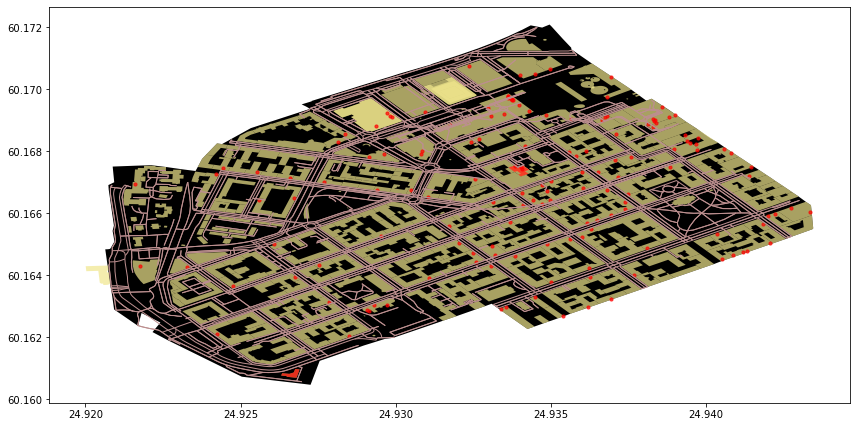

In [20]:
fig, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
area.plot(ax=ax, facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

# Plot buildings
buildings.plot(ax=ax, facecolor='khaki', alpha=0.7)

# Plot restaurants
restaurants.plot(ax=ax, color='red', alpha=0.7, markersize=10)
plt.tight_layout()

In [22]:
# Set projection
projection = CRS.from_epsg(3067)

# Re-project layers
area = area.to_crs(projection)
edges = edges.to_crs(projection)
buildings = buildings.to_crs(projection)
restaurants = restaurants.to_crs(projection)

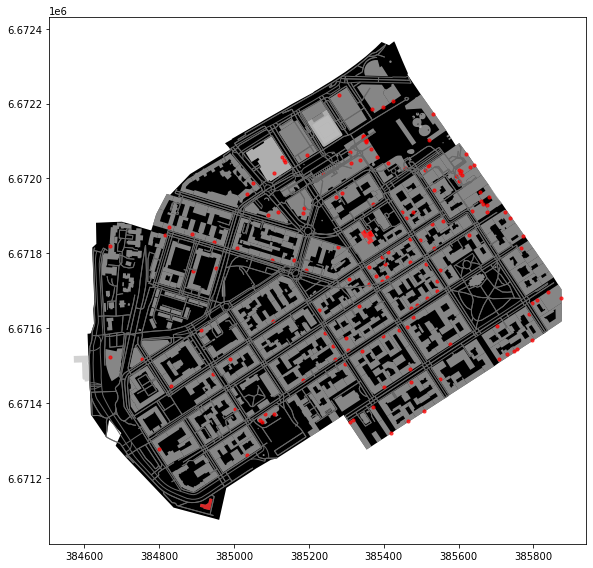

In [23]:
fig, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
area.plot(ax=ax, facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='dimgray')

# Plot buildings
buildings.plot(ax=ax, facecolor='silver', alpha=0.7)

# Plot restaurants
restaurants.plot(ax=ax, color='red', alpha=0.7, markersize=10)
plt.tight_layout()

# Park polygons

In [24]:
leisure = ox.footprints_from_place(place_name, footprint_type="leisure")
leisure.head()

,nodes,leisure,geometry,name,name:fi,name:sv,hoitoluokitus_viheralue,source,wikidata,wikipedia,access,barrier,alt_name,loc_name,sport,colour,fixme,mooring,short_name,short_name:sv
8042256,"[292719496, 1001543836, 1037987967, 1001544060...",park,"POLYGON ((24.93566 60.17132, 24.93566 60.17130...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8042613,"[552965718, 293390264, 295056669, 256264975, 1...",park,"POLYGON ((24.93701 60.16947, 24.93627 60.16919...",Simonpuistikko,Simonpuistikko,Simonsskvären,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15218362,"[144181223, 150532964, 150532958, 150532966, 1...",park,"POLYGON ((24.92330 60.16499, 24.92323 60.16500...",Työmiehenpuistikko,Työmiehenpuistikko,Arbetarparken,A2,survey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15218739,"[1876856069, 1876856056, 1876856052, 187685606...",park,"POLYGON ((24.92741 60.16575, 24.92741 60.16574...",Lastenlehto,Lastenlehto,Barnslunden,A2,NaN,Q18660505,fi:Lastenlehto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15223911,"[1008235303, 1008235126, 1008235240, 100823522...",park,"POLYGON ((24.93126 60.16589, 24.93077 60.16624...",Lapinlahden puistikko,Lapinlahden puistikko,Lappviksskvären,A2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
leisure["leisure"].value_counts()

park          15
pitch          8
playground     6
dog_park       2
marina         1
flowerbed      1
garden         1
Name: leisure, dtype: int64

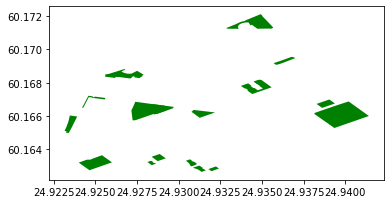

In [27]:
parks = leisure[leisure["leisure"].isin(["park","playground"])]
parks.plot(color="green");

In [28]:
parks = parks.to_crs(projection)

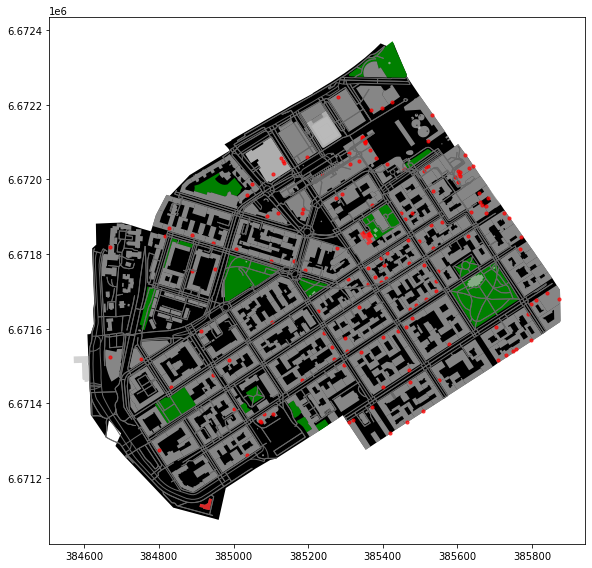

In [29]:
fig, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
area.plot(ax=ax, facecolor='black')

# Plot the parks
parks.plot(ax=ax, facecolor="green")

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='dimgray')

# Plot buildings
buildings.plot(ax=ax, facecolor='silver', alpha=0.7)

# Plot restaurants
restaurants.plot(ax=ax, color='red', alpha=0.7, markersize=10)
plt.tight_layout()